In [62]:
import pandas as pd

In [63]:
# dataset https://archive.ics.uci.edu/ml/datasets/Spambase

names = [
'word_freq_make'         ,
'word_freq_address'      ,
'word_freq_all'          ,
'word_freq_3d'           ,
'word_freq_our'          ,
'word_freq_over'         ,
'word_freq_remove'       ,
'word_freq_internet'     ,
'word_freq_order'        ,
'word_freq_mail'         ,
'word_freq_receive'      ,
'word_freq_will'         ,
'word_freq_people'       ,
'word_freq_report'       ,
'word_freq_addresses'    ,
'word_freq_free'         ,
'word_freq_business'     ,
'word_freq_email'        ,
'word_freq_you'          ,
'word_freq_credit'       ,
'word_freq_your'         ,
'word_freq_font'         ,
'word_freq_000'          ,
'word_freq_money'        ,
'word_freq_hp'           ,
'word_freq_hpl'          ,
'word_freq_george'       ,
'word_freq_650'          ,
'word_freq_lab'          ,
'word_freq_labs'         ,
'word_freq_telnet'       ,
'word_freq_857'          ,
'word_freq_data'         ,
'word_freq_415'          ,
'word_freq_85'           ,
'word_freq_technology'   ,
'word_freq_1999'         ,
'word_freq_parts'        ,
'word_freq_pm'           ,
'word_freq_direct'       ,
'word_freq_cs'           ,
'word_freq_meeting'      ,
'word_freq_original'     ,
'word_freq_project'      ,
'word_freq_re'           ,
'word_freq_edu'          ,
'word_freq_table'        ,
'word_freq_conference'   ,
'char_freq_comma'        ,
'char_freq_parantez'     ,
'char_freq_bracketh'     ,
'char_freq_esq'          ,
'char_freq_dolar'        ,
'char_freq_diez'         ,
'capital_run_length_average' ,
'capital_run_length_longest' ,
'capital_run_length_total',
'spam'
]

df = pd.read_csv("spambase.data",header=None,names=names)

In [64]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_comma,char_freq_parantez,char_freq_bracketh,char_freq_esq,char_freq_dolar,char_freq_diez,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [65]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [66]:
df.shape

(4601, 58)

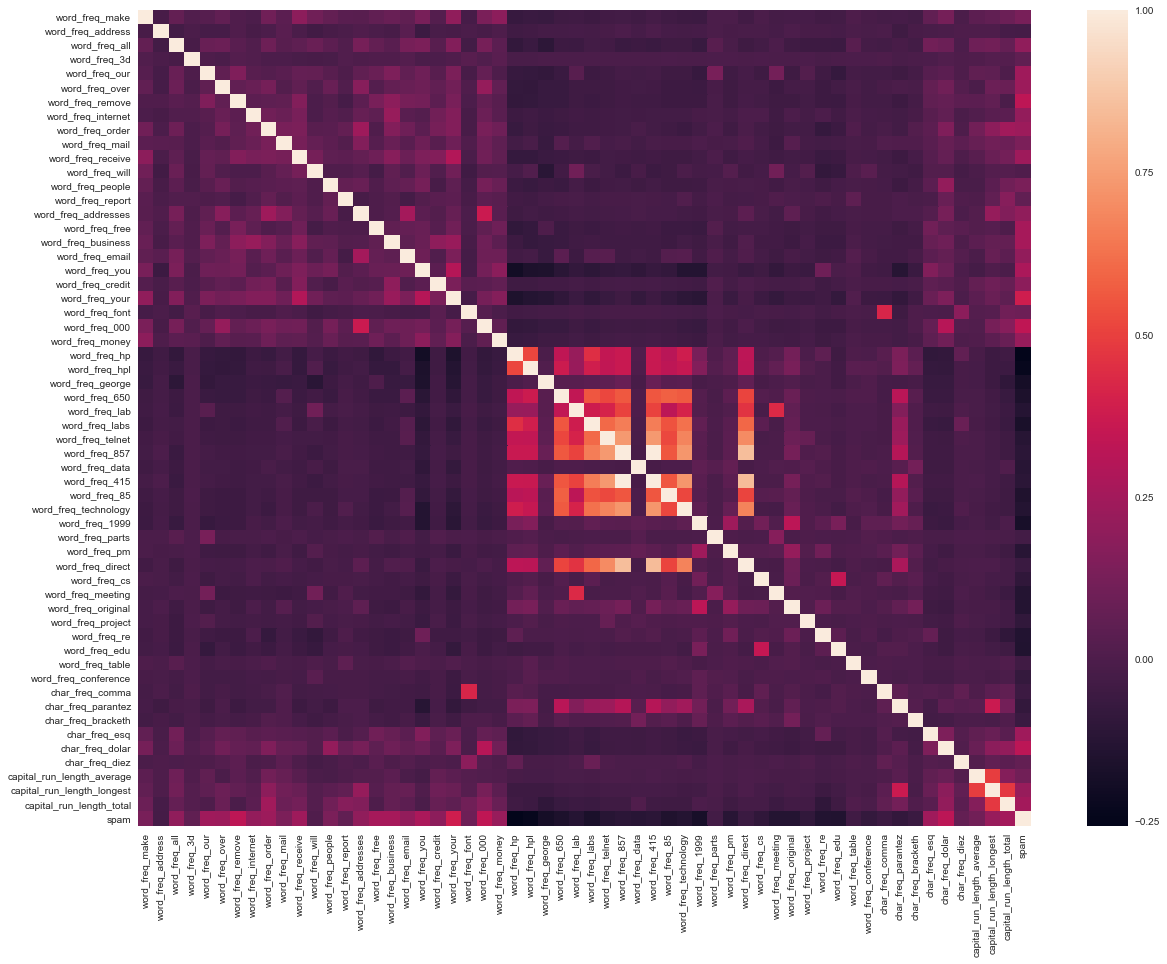

In [67]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20,15)})
corr = df.corr()
sns.heatmap(corr.values,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [68]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))

Top Absolute Correlations
word_freq_857  word_freq_415       0.996066
               word_freq_direct    0.848021
word_freq_415  word_freq_direct    0.845359
dtype: float64


In [69]:
del df["word_freq_415"]
del df["word_freq_direct"]

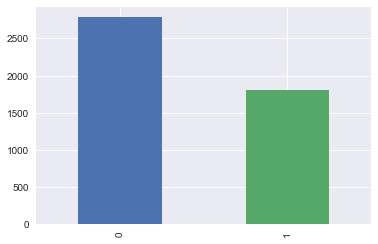

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline 

df.spam.value_counts().plot(kind="bar")

In [71]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [72]:
y  = df["spam"]

In [73]:
del df["spam"]

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.2, stratify=y)

y = y.ravel()

In [75]:
# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X_train.as_matrix(),y_train.as_matrix())
# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train.as_matrix())

/Users/bulent/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	55
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	55
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	55
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	55
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	55
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	55
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	55
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	41
Tentative: 	14
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	41
Tentative: 	11
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	41
Tentative: 	11
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	41
Tentative: 	11
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	46
Tentative: 	6
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	46
Tentative: 	6
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	46
Tentative: 	6
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	46
Tentative: 	6
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	48
Tentative: 	4
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	48
Tentative: 	4
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	48
Tentative: 	4
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	50
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	50
Tentative: 	1
Rejected: 	4
Iteration: 	62 / 100
Confirmed: 	51
Tentative: 	0
Rejected: 	4


BorutaPy finished running.

Iteration: 	63 / 100
Confirmed: 	51
Tentative: 	0
Rejected: 	4


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/bulent/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [76]:
feature_df = pd.DataFrame(X_train.columns.tolist(), columns=['features'])
feature_df ['rank']=feat_selector.ranking_

print (feature_df.head(feat_selector.n_features_))

                features  rank
0         word_freq_make     1
1      word_freq_address     1
2          word_freq_all     1
3           word_freq_3d     3
4          word_freq_our     1
5         word_freq_over     1
6       word_freq_remove     1
7     word_freq_internet     1
8        word_freq_order     1
9         word_freq_mail     1
10     word_freq_receive     1
11        word_freq_will     1
12      word_freq_people     1
13      word_freq_report     2
14   word_freq_addresses     1
15        word_freq_free     1
16    word_freq_business     1
17       word_freq_email     1
18         word_freq_you     1
19      word_freq_credit     1
20        word_freq_your     1
21        word_freq_font     1
22         word_freq_000     1
23       word_freq_money     1
24          word_freq_hp     1
25         word_freq_hpl     1
26      word_freq_george     1
27         word_freq_650     1
28         word_freq_lab     1
29        word_freq_labs     1
30      word_freq_telnet     1
31      

In [77]:
from sklearn.svm import SVC
svm=SVC(C=1.0,kernel='rbf',gamma=0.01) 

# if number of features is less than 1000 and observation between 10-10.000 we may use RBF Gaussian, 
# otherwise "linear kernel"

In [78]:
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [79]:
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [80]:
y_predi = svm.predict(X_train)
nn_accy = round(accuracy_score(y_predi, y_train), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_train)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_train)
print(nnrep)

0.929 

[[2140  173]
 [  90 1277]] 

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2313
           1       0.88      0.93      0.91      1367

   micro avg       0.93      0.93      0.93      3680
   macro avg       0.92      0.93      0.92      3680
weighted avg       0.93      0.93      0.93      3680



In [81]:
y_predi=svm.predict(X_test)
nn_accy = round(accuracy_score(y_predi, y_test), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_test)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_test)
print(nnrep)

0.826 

[[471  73]
 [ 87 290]] 

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       544
           1       0.80      0.77      0.78       377

   micro avg       0.83      0.83      0.83       921
   macro avg       0.82      0.82      0.82       921
weighted avg       0.83      0.83      0.83       921



In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_predi = lr.predict(X_train)

nn_accy = round(accuracy_score(y_predi, y_train), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_train)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_train)
print(nnrep)

y_predi = lr.predict(X_test)

nn_accy = round(accuracy_score(y_predi, y_test), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_test)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_test)
print(nnrep)

0.931 

[[2127  150]
 [ 103 1300]] 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2277
           1       0.90      0.93      0.91      1403

   micro avg       0.93      0.93      0.93      3680
   macro avg       0.93      0.93      0.93      3680
weighted avg       0.93      0.93      0.93      3680

0.922 

[[525  39]
 [ 33 324]] 

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       564
           1       0.89      0.91      0.90       357

   micro avg       0.92      0.92      0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



/Users/bulent/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [85]:
y_predi = classifier.predict(X_train)

nn_accy = round(accuracy_score(y_predi, y_train), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_train)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_train)
print(nnrep)

y_predi = classifier.predict(X_test)

nn_accy = round(accuracy_score(y_predi, y_test), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_test)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_test)
print(nnrep)

0.863 

[[1994  267]
 [ 236 1183]] 

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2261
           1       0.82      0.83      0.82      1419

   micro avg       0.86      0.86      0.86      3680
   macro avg       0.86      0.86      0.86      3680
weighted avg       0.86      0.86      0.86      3680

0.817 

[[478  89]
 [ 80 274]] 

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       567
           1       0.75      0.77      0.76       354

   micro avg       0.82      0.82      0.82       921
   macro avg       0.81      0.81      0.81       921
weighted avg       0.82      0.82      0.82       921



In [86]:
import tensorflow as tf
import numpy as np

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(8, input_dim=X_train.shape[1], activation='relu'),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(np.array(X_train), np.array(y_train), epochs=10)
loss_and_metrics = model.evaluate(X_test, y_test)
print(loss_and_metrics)

Epoch 1/10
3680/3680 [==============================] - 0s 121us/step - loss: 3.2002 - acc: 0.5853
Epoch 2/10
3680/3680 [==============================] - 0s 43us/step - loss: 0.7365 - acc: 0.7921
Epoch 3/10
3680/3680 [==============================] - 0s 45us/step - loss: 0.4568 - acc: 0.8394
Epoch 4/10
3680/3680 [==============================] - 0s 46us/step - loss: 0.4431 - acc: 0.8459
Epoch 5/10
3680/3680 [==============================] - 0s 40us/step - loss: 0.3724 - acc: 0.8799
Epoch 6/10
3680/3680 [==============================] - 0s 41us/step - loss: 0.3289 - acc: 0.8910
Epoch 7/10
3680/3680 [==============================] - 0s 46us/step - loss: 0.3307 - acc: 0.8899
Epoch 8/10
3680/3680 [==============================] - 0s 46us/step - loss: 0.2531 - acc: 0.9149
Epoch 9/10
3680/3680 [==============================] - 0s 43us/step - loss: 0.2794 - acc: 0.9062
Epoch 10/10
921/921 [==============================] - 0s 119us/step
[0.22338002418591585, 0.9283387620855491]


In [87]:
import pickle
filename = 'finalized_svm_model.sav'
pickle.dump(svm, open(filename, 'wb'))


filename = 'finalized_best_logistics_model.sav'
pickle.dump(lr, open(filename, 'wb'))